# Iris flower Classification

### OBJECTIVE OF PROJECT:

The Iris Flower Classification project centers on leveraging machine learning to classify iris flowers into their
respective species based on distinct measurements. With three species - setosa, versicolor, and virginica - differing in their 
measurements, the goal is to train an accurate machine learning model. By analyzing the provided iris measurements, this
project aims to develop a robust classification model capable of effectively distinguishing and classifying iris flowers 
into their specific species.



In [1]:
# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

### 1.Load the data

In [2]:
# Load the data
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### 2.Dataset Summary

In [3]:
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.shape

(150, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Great!!! We have no missing data

### Id is the unique identifier for each flower. In this machine learning project, it will not help with our model's training and testing. Let's drop the Id column first

In [8]:
df = df.drop(['Id'], axis=1)
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

From the printed column names, we can see the "Id" column is dropped now

In [9]:
#Dimension of the dataset
print("the dimension:", df.shape)

the dimension: (150, 5)


We can see we have a dataset with 150 observations and each observation has 6 columns.
4 of the columns are numeric attributes we can use to train machine learning models and the last column is the label of a given flower.

#### Statistical summary using .describe()

In [10]:
print(df.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


Let's interpret the above statistical desciption of our dataset:

The descriptoin shows we have data with super low std(standard deviation)

the range of the SepalLengthCm is: 4.300000 - 7.900000

the range of the SepalWidthCm is: 2.000000 - 4.400000

the range of the PetalLengthCm is: 1.000000 - 6.900000

the range of the PetalWidthCm is: 0.100000 - 2.500000


### Distribution of each class


Since we are predicting the class of a given flower, let's exam what's the class distribution for this dataset

In [11]:
# class distribution
print(df.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# 3. Explore data with visualization

#### Let's visualize the distribution:

Text(0, 0.5, 'count')

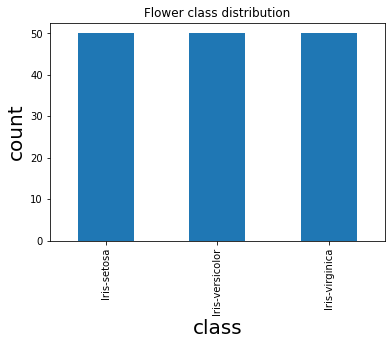

In [12]:
# iris flower dataset class distribution
nameplot = df['Species'].value_counts().plot.bar(title='Flower class distribution')
nameplot.set_xlabel('class',size=20)
nameplot.set_ylabel('count',size=20)


From the above visualization and the summary, we can see each class has equal distribution in the dataset. It's very "ideal" in machine learning project

#### Box and Whisker plot

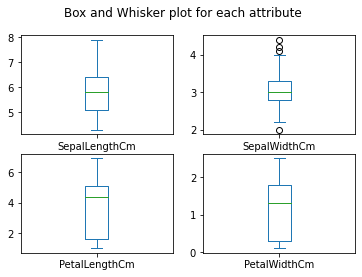

In [13]:
# box and whisker plots
df.plot(kind='box', subplots=True, layout=(2,2), 
               sharex=False, sharey=False, title="Box and Whisker plot for each attribute")
plt.show()


#### Histogram:
Histogram is an very important tool to help visualize the dataset's value distribution.


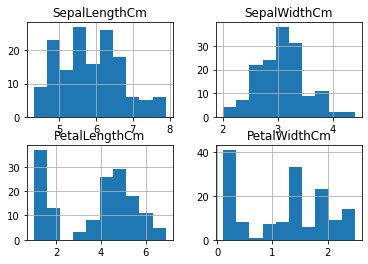

In [14]:
# plot histogram
df.hist()
plt.show()


From the above Box and Whisker plot and histogram, they show 2 of the attirbutes has normal distribution. This is the assumption for many machine learning algorithms. We can utilize the distribution to model our data.

#### Multivariate scatter plot:
Multivariate scatter plot helps us to visualize the pair-wise relationship in our dataset


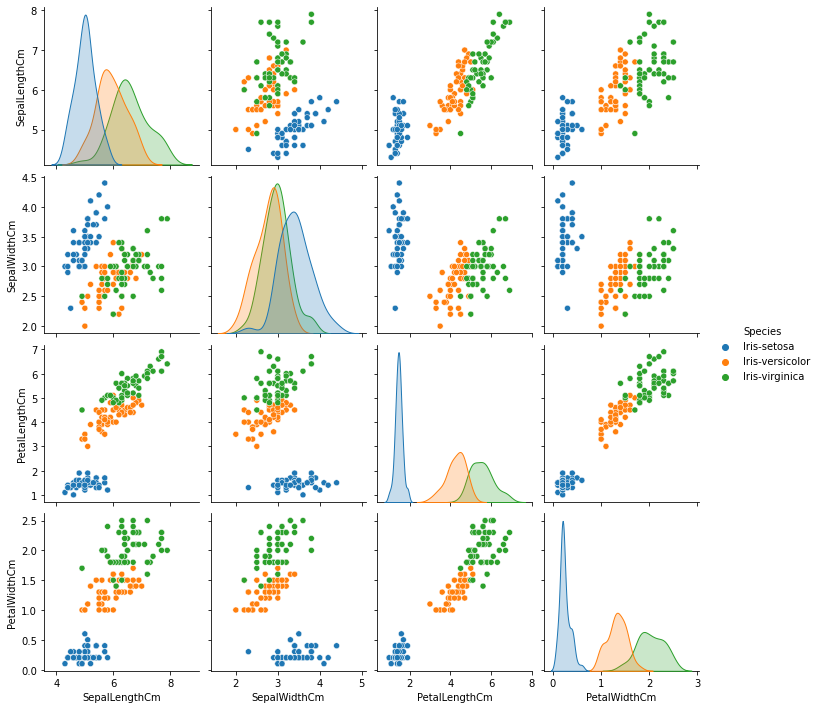

In [15]:
# Visualize the whole dataset
sns.pairplot(df, hue='Species')

In the above scatter plot, we can see PetalWidthCm and PetalLengthCm has the strongest pari-wise relationship for classification. Each class are separated clearly for the pair-wise scatter plot between PetalWidthCm and PetalLengthCm

From this visualization, we can tell that iris-setosa is well separated from the other two flowers.
And iris virginica is the longest flower and iris setosa is the shortest.

### Relationship between species and sepal length

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

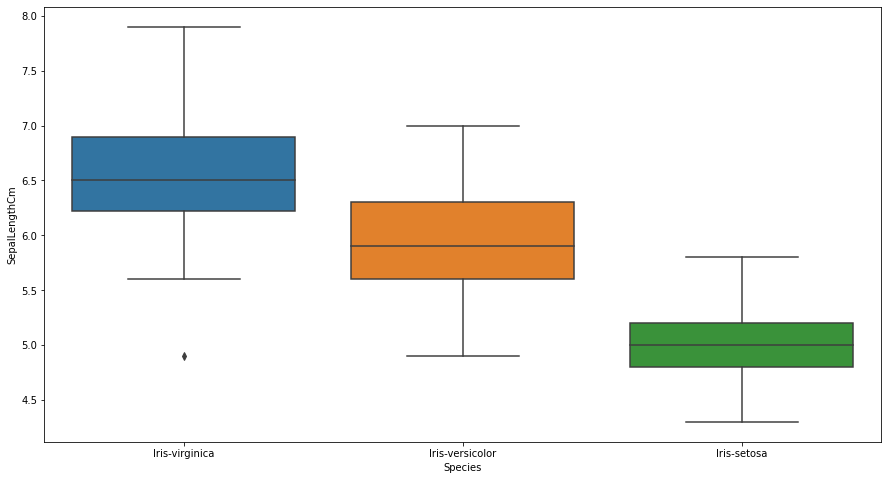

In [16]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Species',y='SepalLengthCm',data=df.sort_values('SepalLengthCm',ascending=False))


### Relationship between species and sepal width

<AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

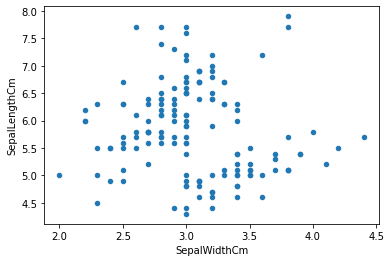

In [17]:
df.plot(kind='scatter',x='SepalWidthCm',y='SepalLengthCm')

### Relationship between sepal width and sepal length

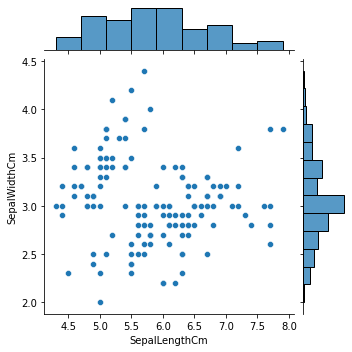

In [18]:

sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, height=5,)

array([[<AxesSubplot:title={'center':'PetalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'PetalWidthCm'}, xlabel='[Species]'>],
       [<AxesSubplot:title={'center':'SepalLengthCm'}, xlabel='[Species]'>,
        <AxesSubplot:title={'center':'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

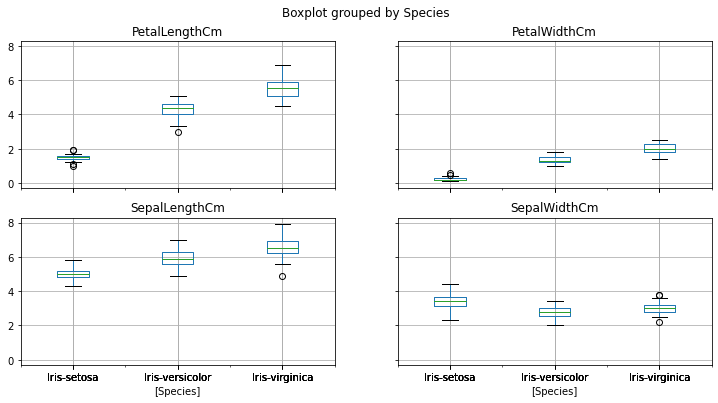

In [19]:
df.boxplot(by="Species", figsize=(12, 6))

### Andrews curves

<AxesSubplot:>

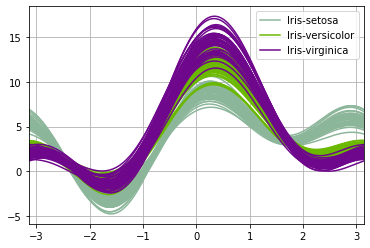

In [20]:
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(df, "Species")

### CategoricalPlot

<Figure size 1080x1080 with 0 Axes>

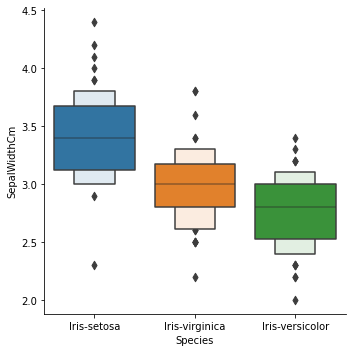

In [21]:
plt.figure(figsize=(15,15))
sns.catplot(x='Species',y='SepalWidthCm',data=df.sort_values('SepalWidthCm',ascending=False),kind='boxen')


### Violinplot

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

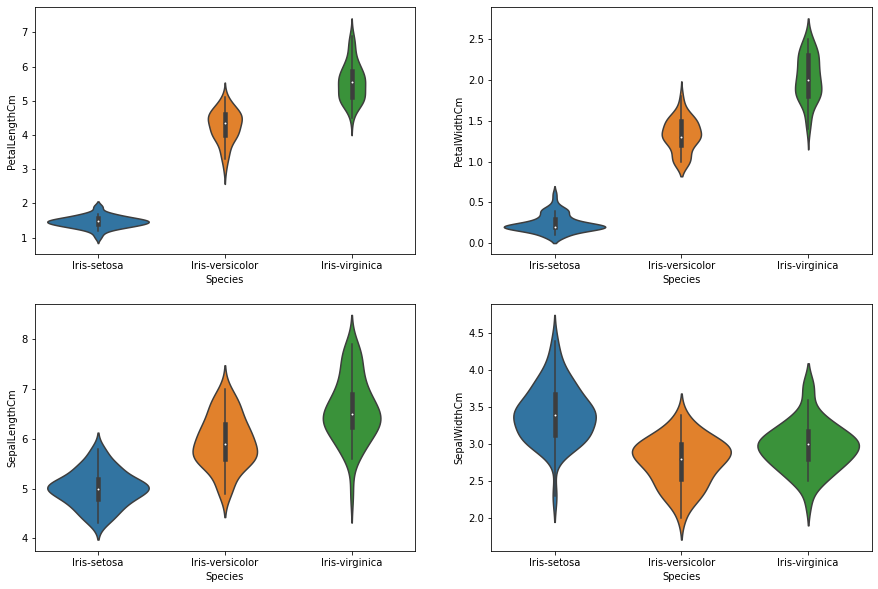

In [22]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

# 3. Model training

Classification problem: our goal is to predict the flow 'Species' with given 4 features: 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', and 'PetalWidthCm'.


### Train-Test Split:
We will use Sklean to Split arrays or matrices into random train and test subsets for training and testing machine learning model.

Our X will be the features of the flowers and Y will be the label of the flowers


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# we will split data to 80% training data and 20% testing data with random seed of 10
X = df.drop(['Species'], axis=1)
Y = df['Species']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [25]:
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("Y_train.shape:", X_train.shape)
print("Y_test.shape:", Y_test.shape)


X_train.shape: (120, 4)
X_test.shape: (30, 4)
Y_train.shape: (120, 4)
Y_test.shape: (30,)


## Model Building

Let's build multiple machine learning models to evaluate how they will perform on our classification problem

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


#### training the models and evaluate with 10-fold cross validation

In [27]:
# models
models = []

# linear models
models.append(('LR', LogisticRegression(solver='liblinear', multi_class="auto")))
models.append(('LDA', LinearDiscriminantAnalysis()))

# nonlinear models
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC(gamma="auto")))

# evaluate each model in turn
print("Model Accuracy:")
names = []
accuracy = []
for name, model in models:
    # 10 fold cross validation to evalue model
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    
    # display the cross validation results of the current model
    names.append(name)
    accuracy.append(cv_results)
    msg = "%s: accuracy=%f std=(%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


Model Accuracy:
LR: accuracy=0.958333 std=(0.055902)
LDA: accuracy=0.975000 std=(0.038188)
CART: accuracy=0.950000 std=(0.076376)
KNN: accuracy=0.983333 std=(0.033333)
GNB: accuracy=0.966667 std=(0.040825)
SVC: accuracy=0.991667 std=(0.025000)


#### Test the KNN, GNB, and SVC models with test data and output their accuracy with confusion matrix together for selecting model


In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [29]:
# models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC(gamma="auto")))

### We will evalue the testing with accuracy score, confusion matrix, and classification report with Sklearn 

In [30]:
# reusable function to test our model
def test_model(model):
    model.fit(X_train, Y_train) # train the whole training set
    predictions = model.predict(X_test) # predict on test set
    
    # output model testing results
    print("Accuracy:", accuracy_score(Y_test, predictions))
    print("Confusion Matrix:")
    print(confusion_matrix(Y_test, predictions))
    print("Classification Report:")
    print(classification_report(Y_test, predictions))


In [31]:
# predict values with our test set
for name, model in models:
    print("----------------")
    print("Testing", name)
    test_model(model)

----------------
Testing KNN
Accuracy: 0.9
Confusion Matrix:
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

----------------
Testing GNB
Accuracy: 0.8333333333333334
Confusion Matrix:
[[7 0 0]
 [0 9 3]
 [0 2 9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.82      0.75      0.78        12
 Iris-virginica       0.75      0.82      0.78        11

       accuracy                           0.83        30
      macro avg       0.86      0.86      0.86        30
   wei

The highest testing accuracy is 0.93 from Support Vector Classifier.

The SVC's confustion matrix has the highest diagonal values indicated that SVC predicted the class type better than the other 2 models.

From above confusion matrix and classification report, the SVC model is the best model for our classification problem.


## Conclusion:
This kernel described and explored the classic Iris dataset with data visualizations. And we also experimented with 4 machine learning models: 2 linear and 4 non-linear models.

I examined the training results with 10-fold cross validation and chose SVC as the best model with testing confusion matrix output and classification report.